<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_18_Advanced_Ensemble_Techniques(Boosting)(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Boosting in Machine Learning?
Traditionally, building a Machine Learning application consisted on taking a single learner, like a Logistic Regressor, a Decision Tree, Support Vector Machine, or an Artificial Neural Network, feeding it data, and teaching it to perform a certain task through this data.

Then ensemble methods were born, which involve using **many learners** to enhance the performance of any single one of them individually. These methods can be described as techniques that use a **group of weak learners** (those who on average achieve only slightly better results than a random model) together, in order to create a **stronger, aggregated one.**

Generally, ensemble methods are built by grouping variants of individual Decision Trees, as we will see later.

Boosting models fall inside this family of **ensemble methods.**

Boosting, initially named **Hypothesis Boosting**, consists on the idea of filtering or weighting the data that is used to train our team of weak learners, so that each new learner gives more weight or is only trained with observations that have been poorly classified by the previous learners.

By doing this our team of models learns to make accurate predictions on all kinds of data, not just on the most common or easy observations. Also, if one of the individual models is very bad at making predictions on some kind of observation, it does not matter, as the other N-1 models will most likely make up for it.

Boosting should not be confused with Bagging, which is the other main family of ensemble methods: while in bagging the weak learners are trained in parallel using randomness, in **boosting the learners are trained sequentially**, in order to be able to perform the task of data weighting/filtering described in the previous paragraph.



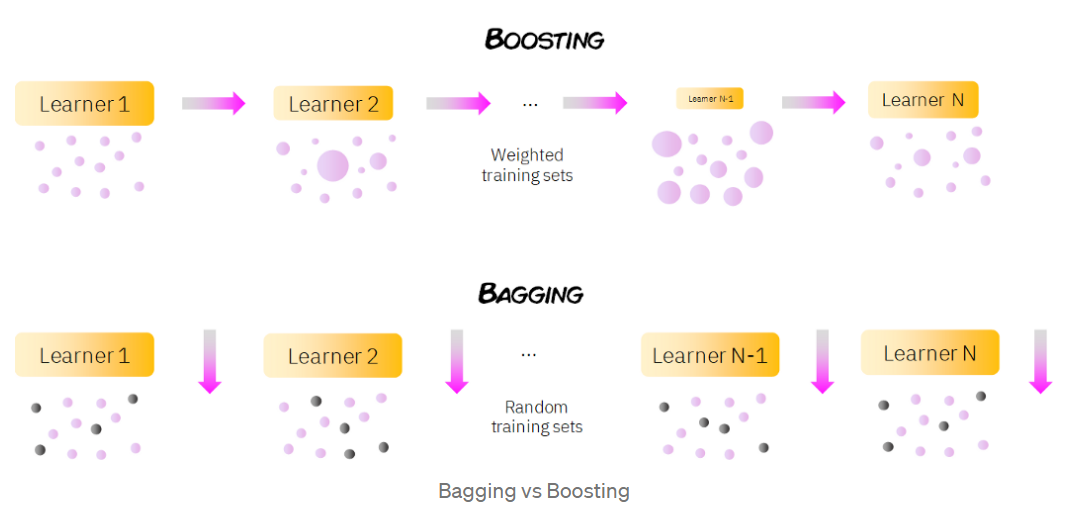

As we can see from the previous image, **in boosting the models can have different importance or weights** (represented in the different sizes of the learners), while **in bagging all learners have the same weight** in the final decision.

Also, in boosting, the **data set is weighted** (represented by the different sizes of the data points), so that observations that were incorrectly classified by classifier n are given more importance in the training of model n + 1, while in bagging the training **samples are taken randomly** from the whole population.

Now that we have seen what boosting is, and its differences with bagging, let's see why it works so well!

# Why is Boosting so effective?
In general, ensemble methods **reduce the bias and variance** of our Machine Learning models. 

Ensemble methods help increase the stability and performance of machine learning models **by eliminating the dependency of a single estimator**. This can be clearly seen with a Bagging example: Random Forest.

Random Forest are, as their name suggests, a group of individual Decision trees that make up a forest. These individual trees are quite prone to overfiting the data, and despite being very simple and intuitive models, they’re not so great at making predictions.

However, if we use many trees these problems disappear, as each tree is trained with different samples of data and different features, resulting in a stronger and more robust model overall.

**With boosting, this works in the same way, but while in bagging each model is trained independently, in boosting the N models are trained sequentially, taking into account the success of the previous model and increasing the weights of the data that this previous model has had the highest error on, which makes the subsequent models focus on the most difficult data observations.**

Also, **the individual models that perform the best** on the weighted training samples, will become stronger (get a higher weight), and therefore have a higher impact on the final prediction.

Alright, this sounds lovely, but how are these models actually trained?

# How is a Boosting Model Trained?
The training process depends on the Boosting algorithm that we are using (Adaboost vs LigthGBM vs XGBoost…), but generally it follows this pattern:

1. **All the data samples start with the same weights.** These samples are used to train an individual model (a Decision Tree lets say).
2. The prediction error for each sample is calculated, increasing the **weights of those samples** which have had a greater error, to make them more important for the training of following individual model.
3. Depending on how well this **individual model** did on its predictions, it **gets assigned an importance/weight or amount of say**. A model that outputs very good predictions will have a high amount of say in the final decision.
4. **The weighted data is passed on to the posterior model**, and 2) and 3) are repeated.

5. Number 4) is repeated until we have reached an certain number of models or until the error is bellow a certain threshold.

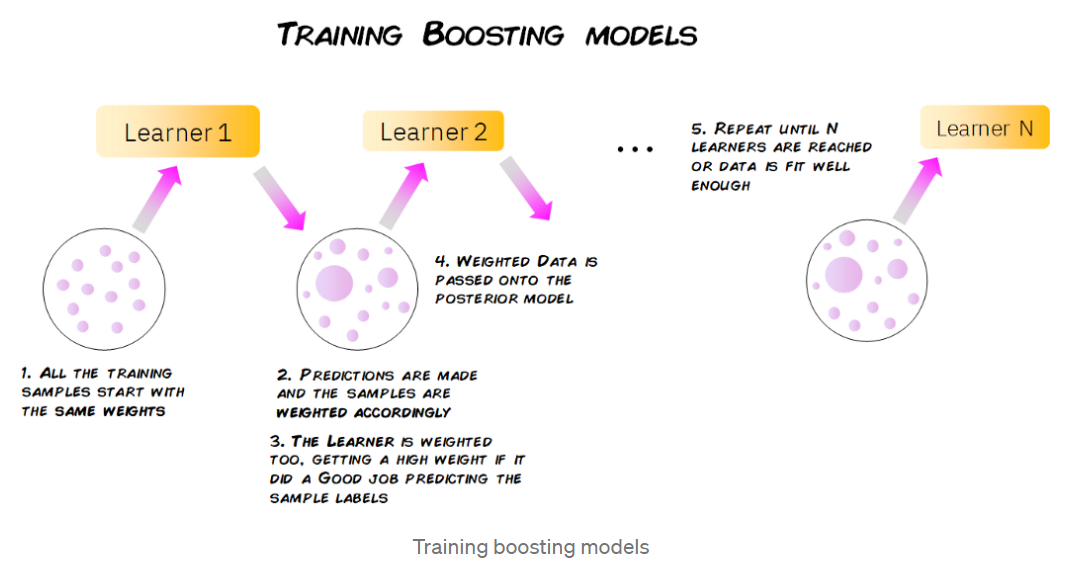

In some cases, boosting models are trained with an **specific fixed weight for each learner** (called learning rate) and instead of giving each sample an individual weight, the models are trained trying to predict the differences between the previous predictions on the samples and the real values of the objective variable. This difference are what we call **residuals.**

We will speak about this more later, when we see the different kind of boosting models, however, the main characteristic of the family still remains: **the sequential training on many individual learners to create a more powerful, aggregated model.**

Awesome! Now that we know how Boosting models are trained, let's see how they are used to make predictions on new data.

# How does a Boosting Model Make Predictions?
They way a boosting model makes predictions on new data is very simple. When we get a new observation with its features, it is passed through every one of the individual models, having **each model make its own prediction.**

Then, taking into account the weight of each one of these models, all these predictions are **scaled and combined,** and a final global prediction is given.

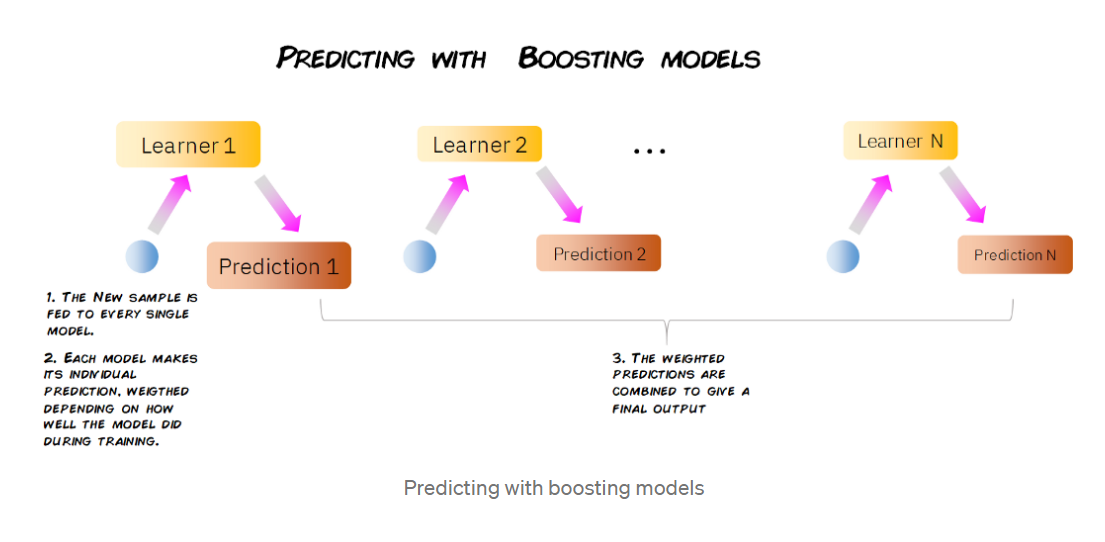

To end, lets explore the characteristics of the most common Boosting models out there.

# Different Boosting Models

# 1. XGBoost

Short for eXtreme gradient boosting, like in Gradient boosting, we fit our trees to the residuals of the previous trees predictions, however, instead of using conventional, fixed size decision trees, XGBoost uses a different kind of trees: XGBoost trees we could call them.

It builds these trees by calculating similarity scores between the observations that end up in a leave node. Also, XGBoost allows for regularisation, reducing the possible overfitting of our individual trees and therefore of the overall ensemble model.

Lastly, XGBoost is optimised to push the limit of the computational resources of boosted tree algorithms, making it a very high performance and fast algorithm in terms of time and computation.

## Features of XGBoost:

1. Can be run on both single and distributed systems(Hadoop, Spark).
2. XGBoost is used in supervised learning(regression and classification problems).
3. Supports parallel processing.
4. Cache optimization.
5. Efficient memory management for large datasets exceeding RAM.
6. Has a variety of regularizations which helps in reducing overfitting.
7. Auto tree pruning – Decision tree will not grow further after certain limits internally.
8. Can handle missing values.
9. Has inbuilt Cross-Validation.
10. Takes care of outliers to some extent.

# Working: XGB Algorithm

Let’s look at how XGboost works with an example. Here I’ll try to predict a child’s IQ based on age. For any basic assumption in such statistical data, we can take the average IQ and find how much variance(loss) is present. Residuals are the losses incurred will be calculated after each model predictions.

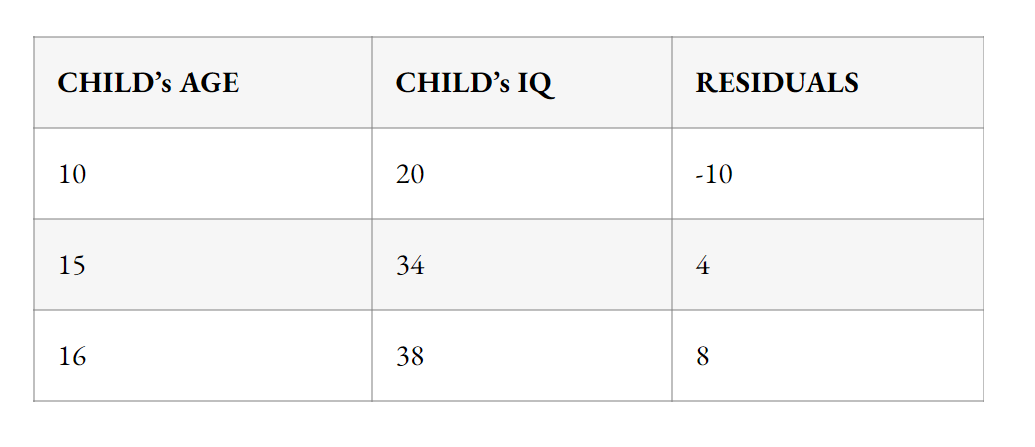

So the average of 20, 34, and 38 is 30.67 for simplicity let’s take it as 30. If we plot a graph keeping y-axis as IQ and x-axis as Age and then we can see the variance in points from the average mark. 

At first, our base model(M0) will give a prediction 30. As from the graph, we know this model suffers a loss which will have some optimisation in the next model(M1). Model M1 will have input as age(independent features) and target as the loss suffered(variances) in M0. Until now it is the same as the gradient boosting technique.

For XGboost some new terms are introduced, 

ƛ -> regularization parameter

Ɣ -> for auto tree pruning

eta -> how much model will converge

Now calculate the similarity score,

Similarity Score(S.S.) =  (S.R ^ 2) / (N + ƛ)

Here, S.R is the sum of residuals,

N is Number of Residuals

At first let's put  ƛ =0, then Similarity Score = (-10+4+8)^2 / 3+0 = 4/3 = 1.33

Let’s make the decision tree using these residuals and similarity scores. I’ve set the tree splitting criteria as Age >10.

Again for these two leaves, we calculate the similarity scores which is 100 and 72. 

After this, we calculate the 

Gain = S.S of the branch before split - S.S of the branch after the split.

Gain = ( 100 + 72 ) – 1.3 

Now we set our Ɣ, which is a value provided to the model at starting and its used during splitting. If Gain>Ɣ then split will happen otherwise not. Let’s assume that Ɣ for this problem is 130 then since the gain is greater than Ɣ, further split will occur. By this method, auto tree pruning will be achieved. The greater the Ɣ value more pruning will be done.

For regularization and preventing overfitting, we must increase the ƛ  which was initially set to 0. But this should be done carefully as greater the ƛ  value lesser the Similarity score, lesser the gain and more the pruning.

**New prediction = Previous Prediction + Learning rate * Output**

XGboost calls the learning rate as eta and its value is set to 0.3 

For the 2nd reading(Age=15) new prediction = 30 + (0.3 * 6) = 31.8

The outcome is 6 is calculated from the average residuals 4 and 8.

New Residual = 34 – 31.8 = 2.2

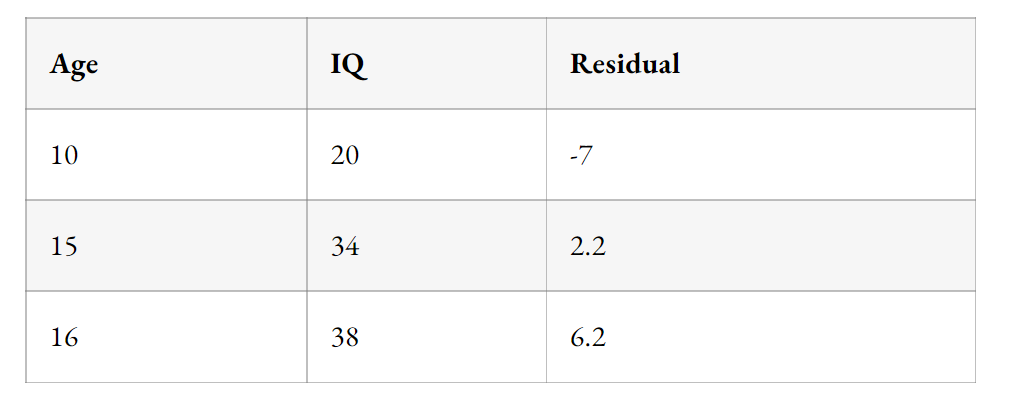

This way model M1 will be trained and residuals will keep on decreasing, which means the loss will be optimized in further models.

# Homework:

1. Adaboost
2. Gradient Boosting
3. LightGBM (imp)
4. CatBoost

References:

1. https://www.youtube.com/watch?v=LsK-xG1cLYA

2. https://www.youtube.com/watch?v=3CC4N4z3GJc

3. https://www.youtube.com/watch?v=OtD8wVaFm6E

4. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

5. https://xgboost.readthedocs.io/en/stable/python/python_api.html

6. https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d